In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("cleaned_data.csv")

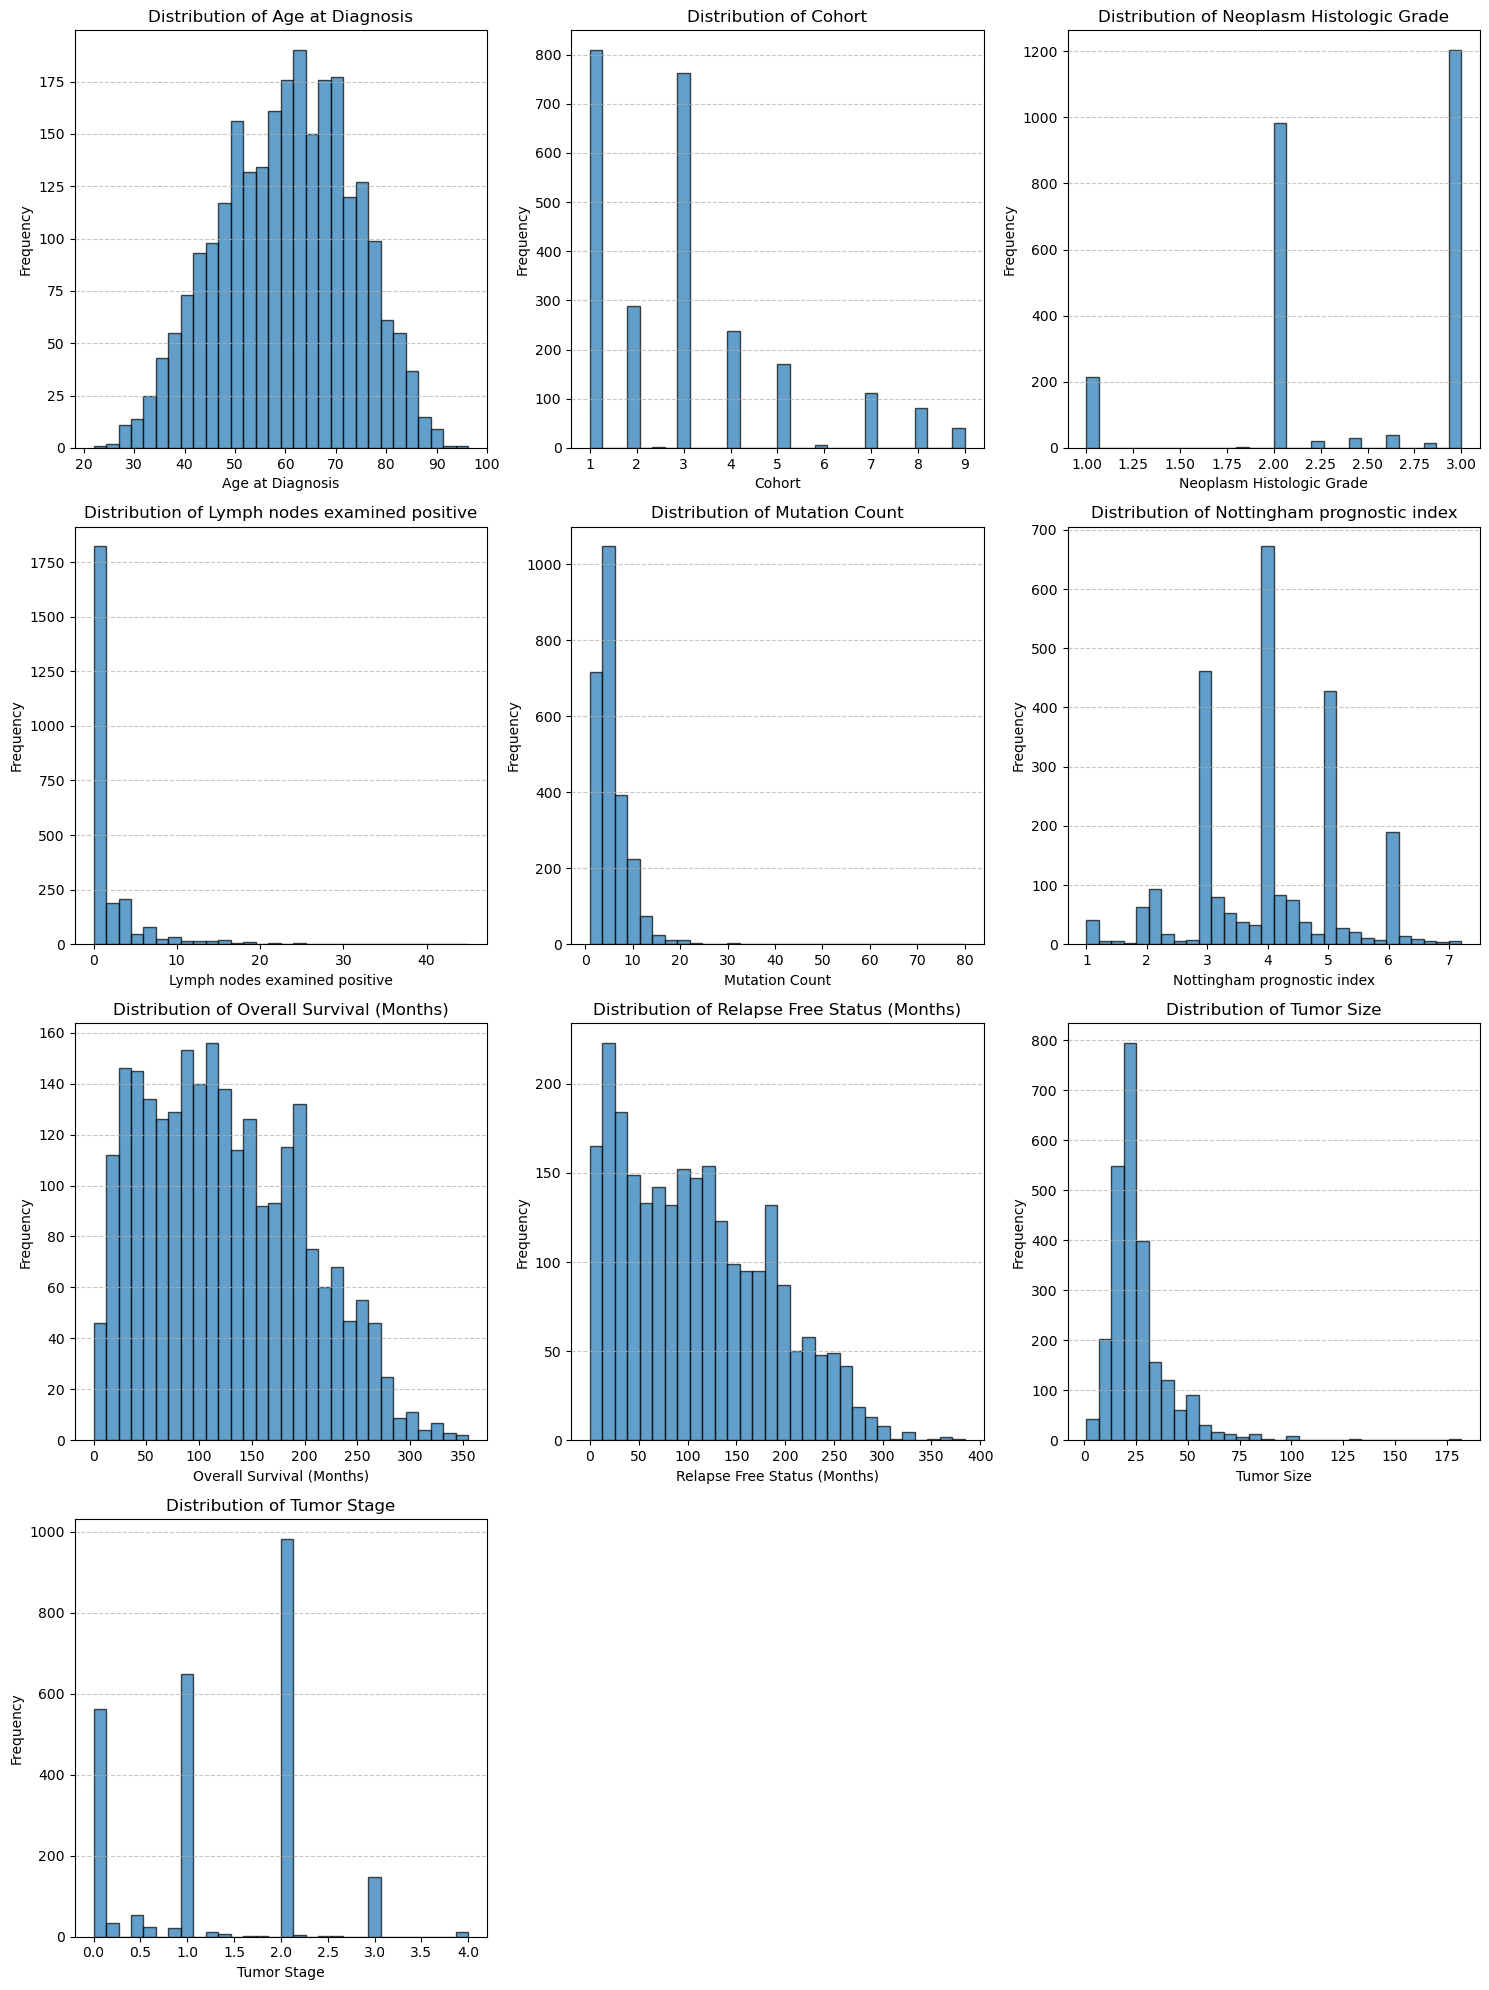

In [4]:
import math
# Identify numerical columns for visualization
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Determine grid size (e.g., 3 columns per row)
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms for all numerical columns
for i, column in enumerate(numerical_columns):
    axes[i].hist(data[column].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the grid of histograms
plt.show()

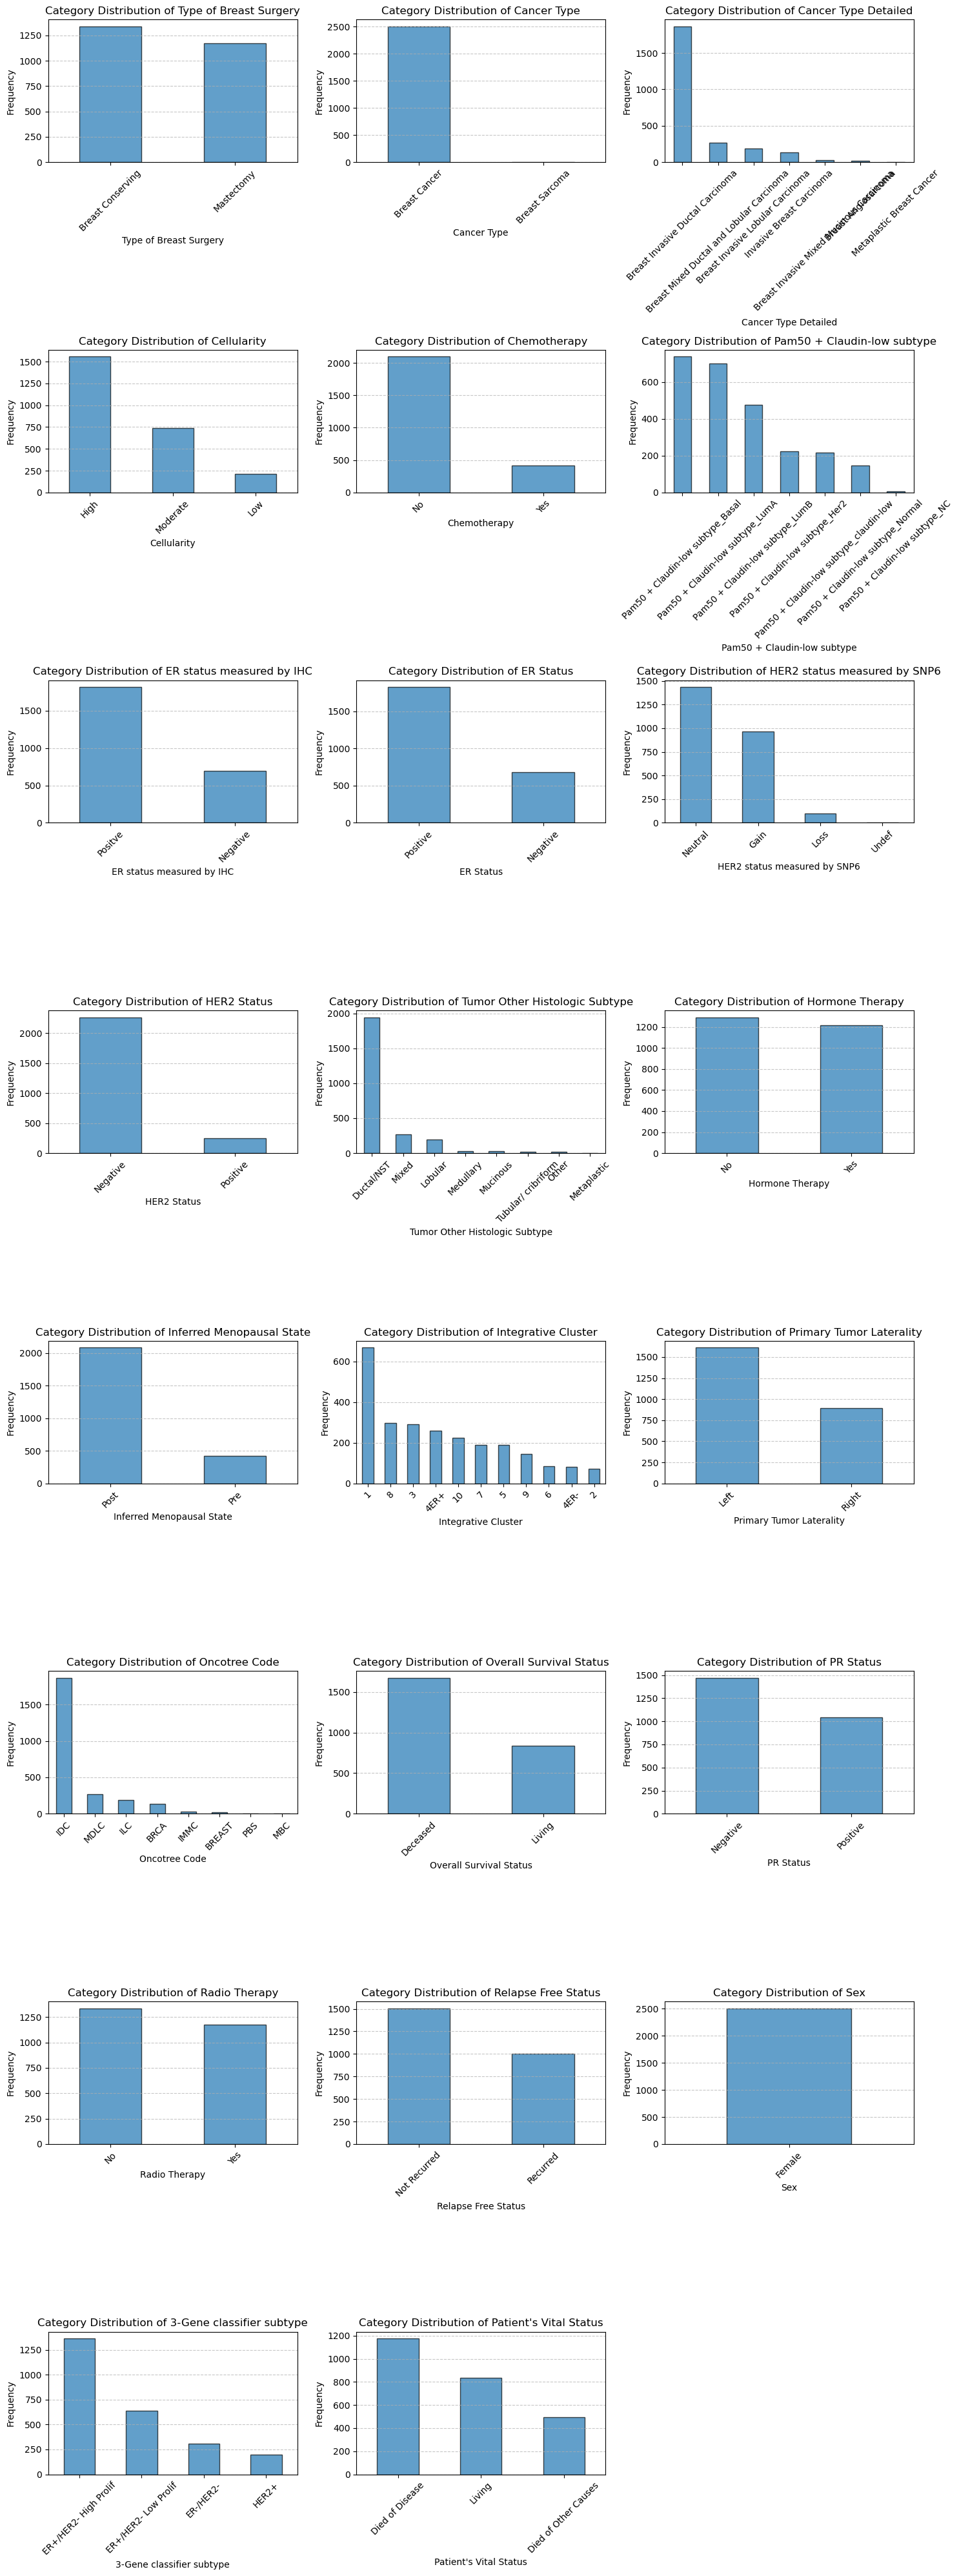

In [7]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Exclude "Patient ID" column
categorical_columns = [col for col in categorical_columns if col != "Patient ID"]

# Determine grid size (e.g., 3 columns per row)
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot bar charts for all categorical columns
for i, column in enumerate(categorical_columns):
    data[column].value_counts().plot(
        kind='bar', ax=axes[i], edgecolor='black', alpha=0.7
    )
    axes[i].set_title(f'Category Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the grid of bar charts
plt.show()

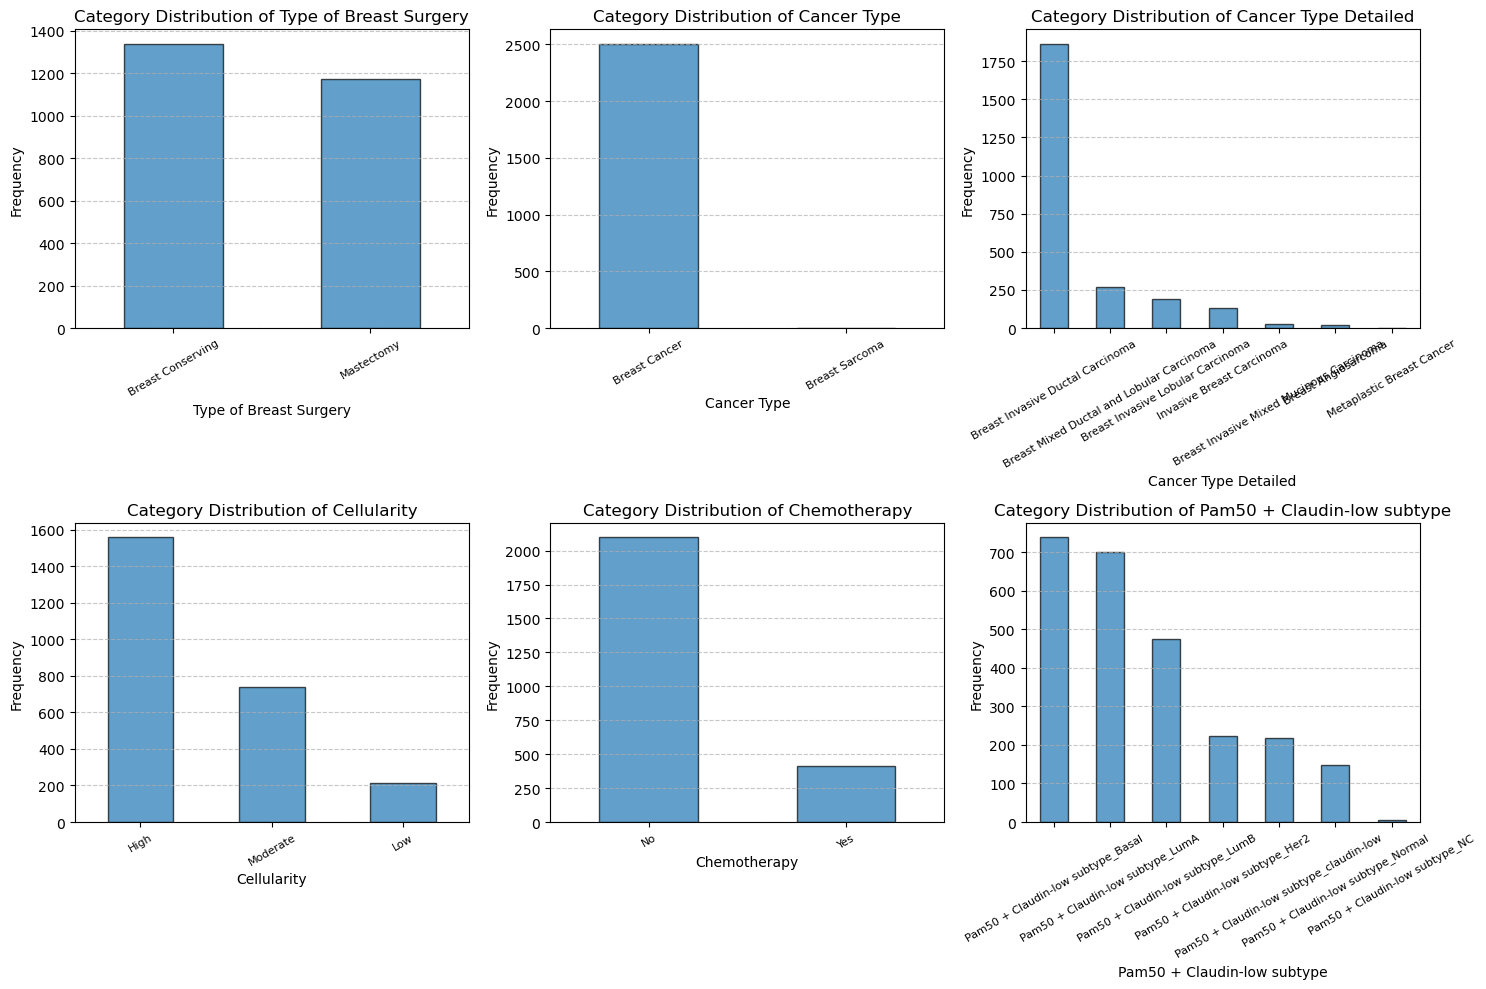

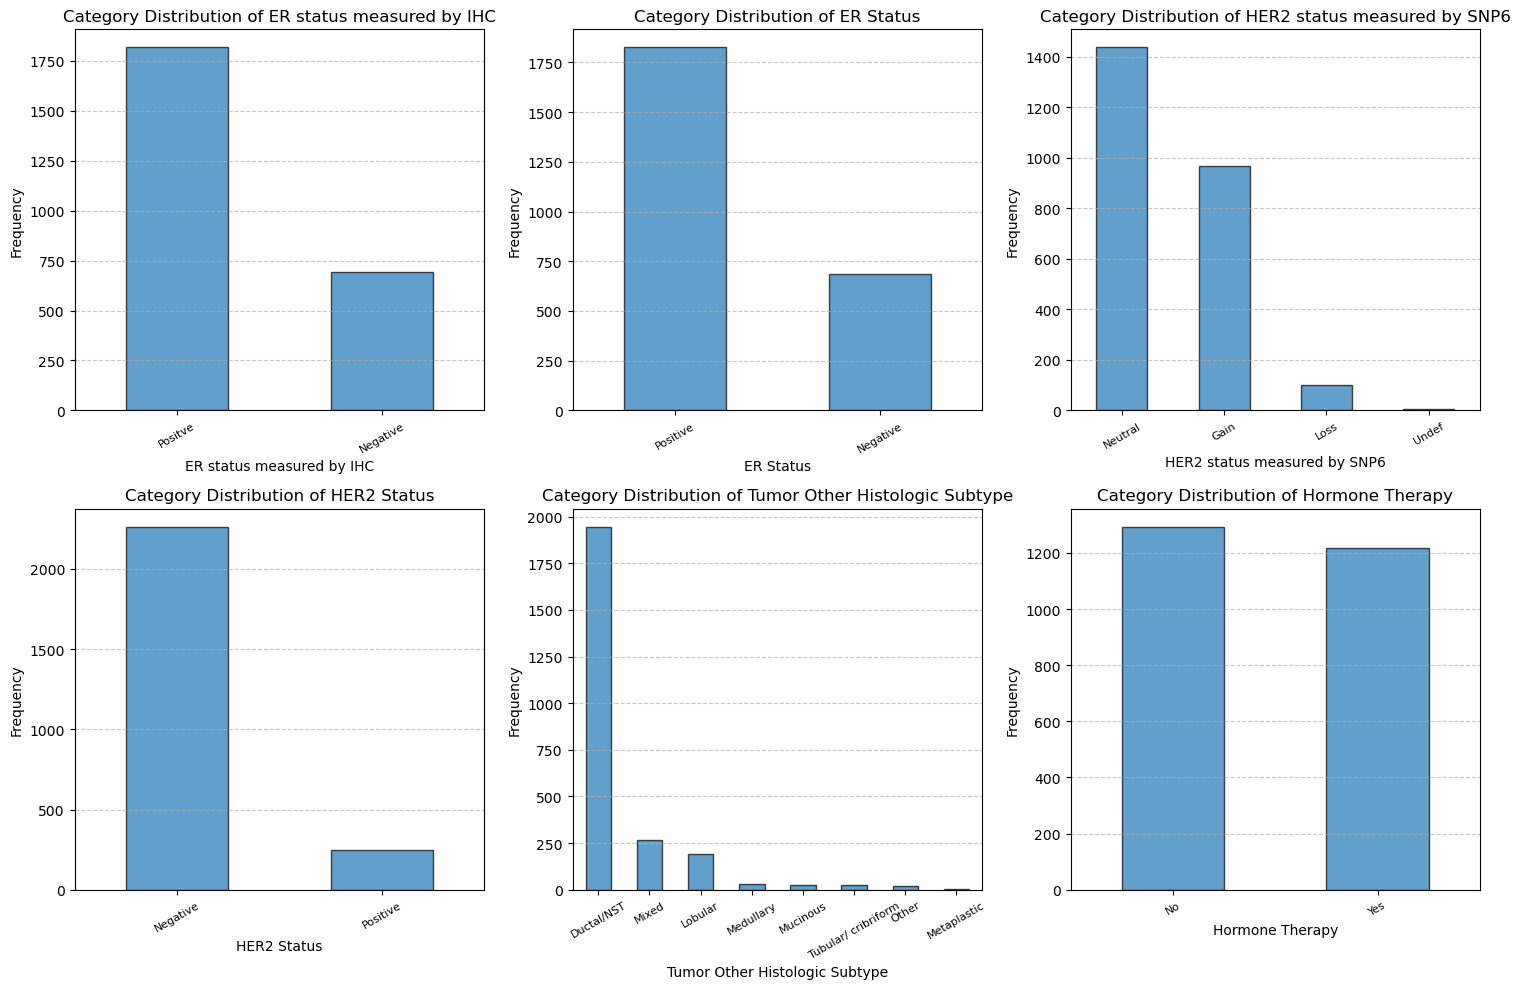

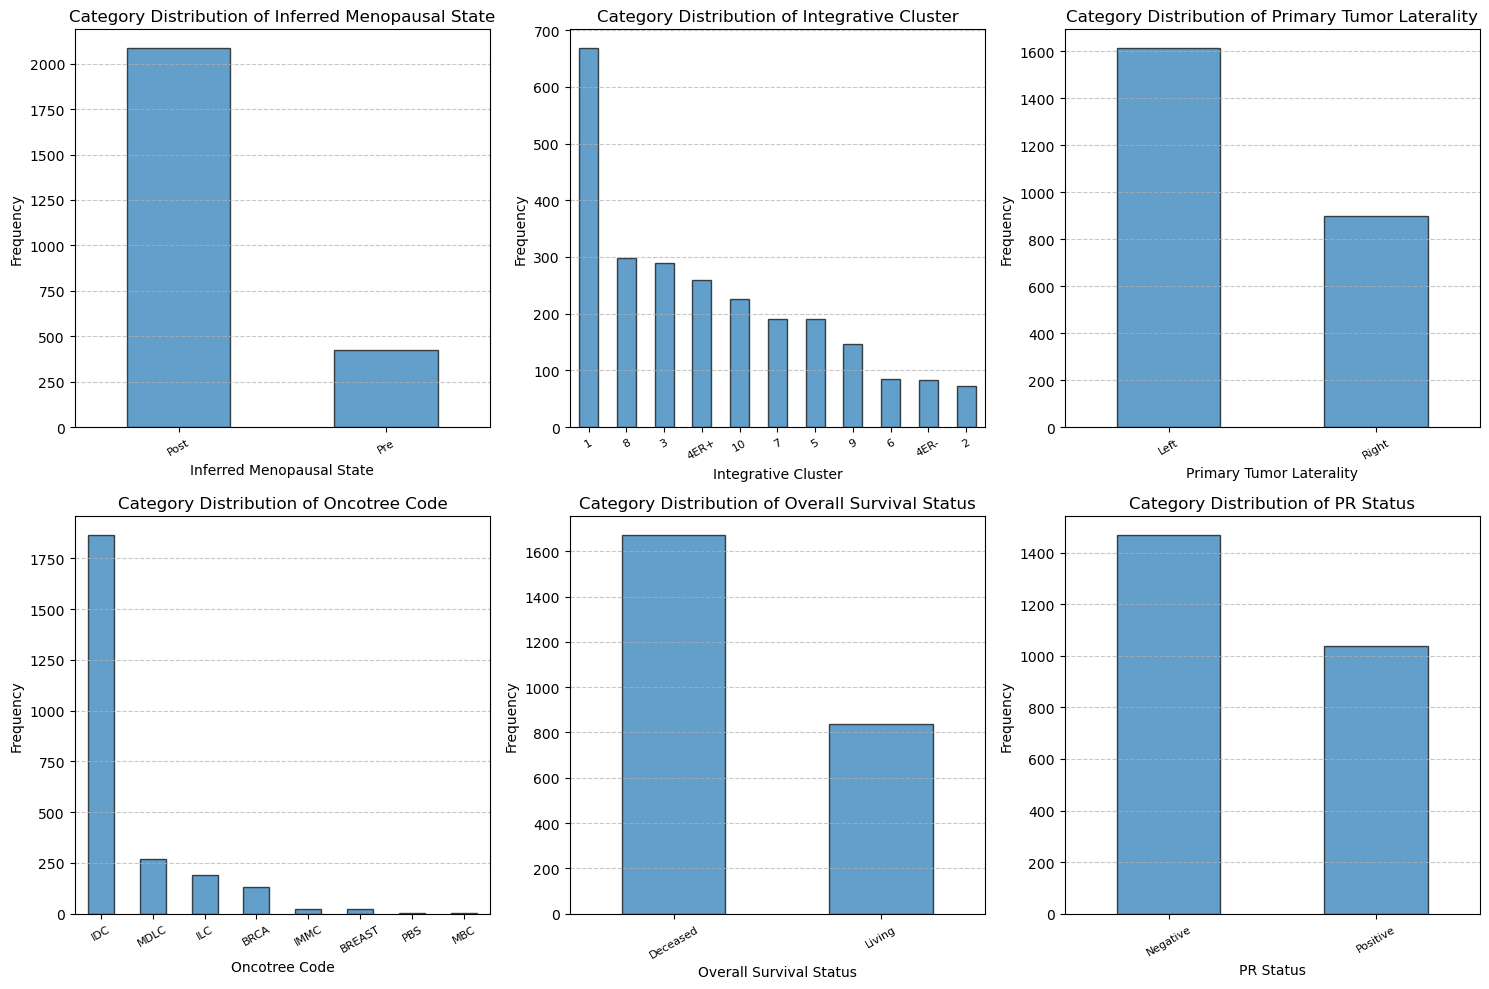

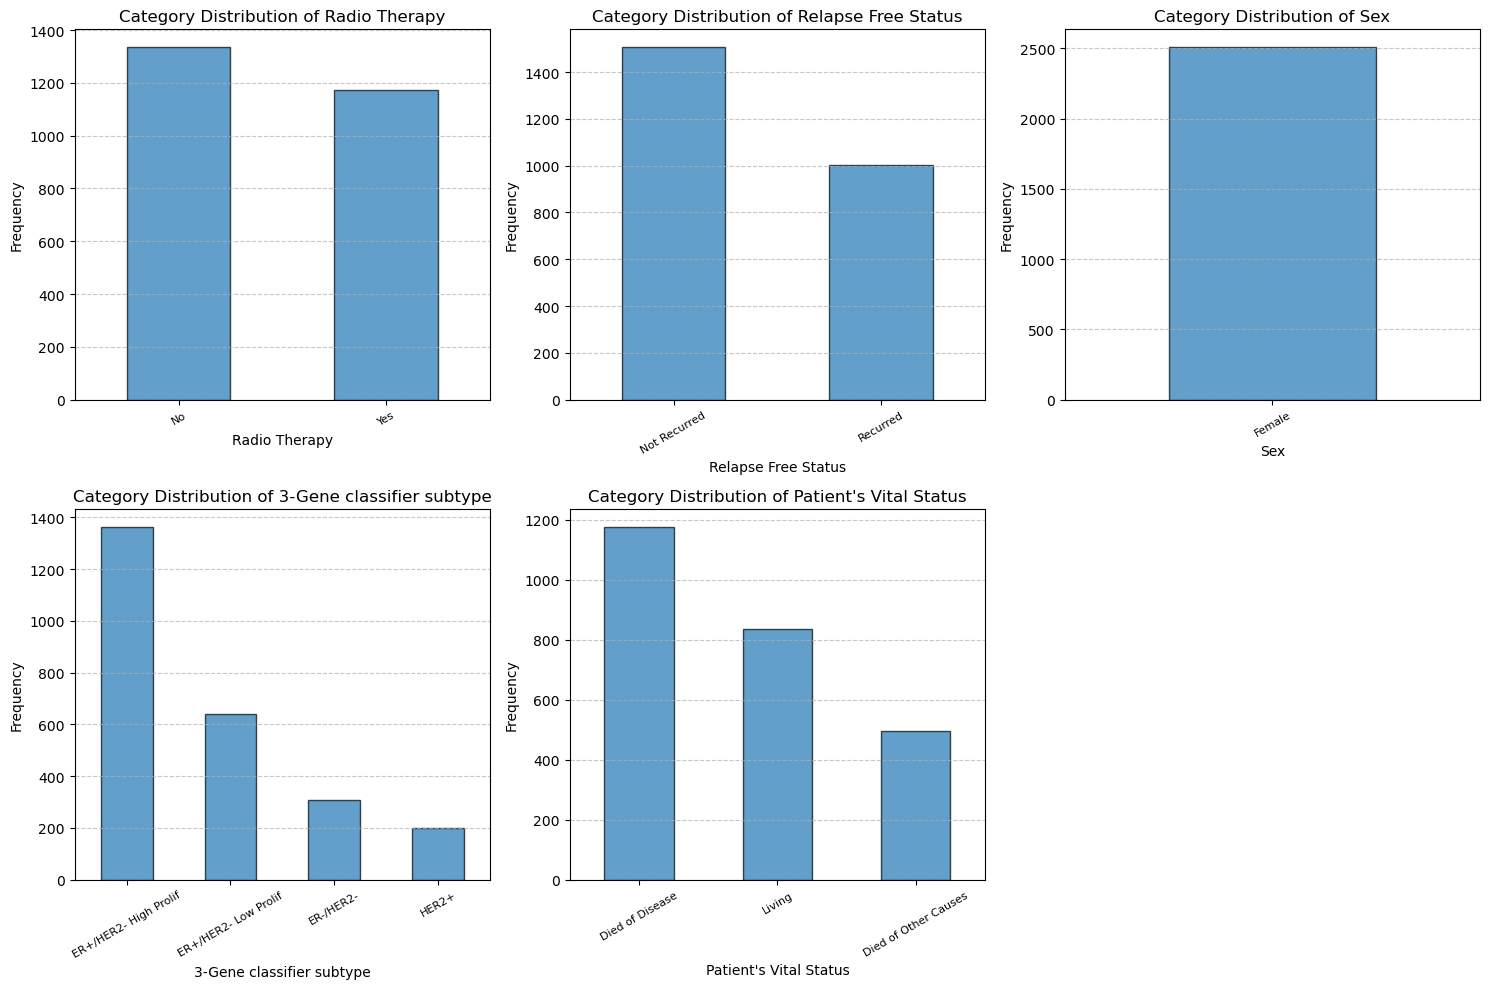

In [8]:


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Exclude "Patient ID" column
categorical_columns = [col for col in categorical_columns if col != "Patient ID"]

# Split the categorical columns into 4 roughly equal parts
split_size = math.ceil(len(categorical_columns) / 4)
split_columns = [categorical_columns[i:i + split_size] for i in range(0, len(categorical_columns), split_size)]

# Generate a separate grid for each part
for idx, group in enumerate(split_columns):
    n_cols = 3  # Number of columns in the grid
    n_rows = math.ceil(len(group) / n_cols)
    
    # Create a figure for the current subset of columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Flatten axes array for easier iteration
    
    # Plot bar charts for each column in the current group
    for i, column in enumerate(group):
        data[column].value_counts().plot(
            kind='bar', ax=axes[i], edgecolor='black', alpha=0.7
        )
        axes[i].set_title(f'Category Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=30, labelsize=8)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    
    # Save each grid as a separate image
   
    plt.show()


In [10]:
threshold = 5  # Example: categories with fewer than 5 occurrences
for column in categorical_columns:
    low_frequency = data[column].value_counts()[data[column].value_counts() < threshold]
    print(f"\nLow-frequency categories in {column}:")
    print(low_frequency)



Low-frequency categories in Patient ID:
MB-0000      1
MB-6195      1
MB-6185      1
MB-6187      1
MB-6188      1
            ..
MB-4140      1
MB-4141      1
MB-4145      1
MB-4146      1
MTS-T2432    1
Name: Patient ID, Length: 2509, dtype: int64

Low-frequency categories in Type of Breast Surgery:
Series([], Name: Type of Breast Surgery, dtype: int64)

Low-frequency categories in Cancer Type:
Breast Sarcoma    3
Name: Cancer Type, dtype: int64

Low-frequency categories in Cancer Type Detailed:
Metaplastic Breast Cancer    2
Name: Cancer Type Detailed, dtype: int64

Low-frequency categories in Cellularity:
Series([], Name: Cellularity, dtype: int64)

Low-frequency categories in Chemotherapy:
Series([], Name: Chemotherapy, dtype: int64)

Low-frequency categories in Pam50 + Claudin-low subtype:
Series([], Name: Pam50 + Claudin-low subtype, dtype: int64)

Low-frequency categories in ER status measured by IHC:
Series([], Name: ER status measured by IHC, dtype: int64)

Low-frequency cat

In [11]:
threshold = 5  # Example: categories with fewer than 5 occurrences
for column in numerical_columns:
    low_frequency = data[column].value_counts()[data[column].value_counts() < threshold]
    print(f"\nLow-frequency categories in {column}:")
    print(low_frequency)



Low-frequency categories in Age at Diagnosis:
61.16    4
37.00    4
64.01    4
76.84    4
57.41    4
        ..
72.48    1
57.98    1
51.81    1
61.97    1
49.93    1
Name: Age at Diagnosis, Length: 1816, dtype: int64

Low-frequency categories in Cohort:
6.0    4
5.8    2
2.4    1
Name: Cohort, dtype: int64

Low-frequency categories in Neoplasm Histologic Grade:
1.8    3
1.6    1
Name: Neoplasm Histologic Grade, dtype: int64

Low-frequency categories in Lymph nodes examined positive:
19.0    4
22.0    4
4.2     3
0.8     3
20.0    3
21.0    3
24.0    2
23.0    2
25.0    2
2.2     1
26.0    1
41.0    1
31.0    1
33.0    1
45.0    1
30.0    1
3.6     1
1.4     1
3.2     1
Name: Lymph nodes examined positive, dtype: int64

Low-frequency categories in Mutation Count:
22.0    4
5.6     4
5.4     4
6.8     3
18.0    3
23.0    2
1.8     2
5.8     2
4.2     2
3.4     2
19.0    2
35.0    1
31.0    1
3.8     1
3.2     1
80.0    1
40.0    1
30.0    1
46.0    1
24.0    1
26.0    1
21.0    1
28.0 